## PyTorch Workflow Fundamentals

The essence of machine learning and deep learning is to take some data from the past, build an algorithm (like a neural network) to discover patterns in it and use the discovered patterns to predict the future.

There are many ways to do this and many new ways are being discovered all the time.

But let's start small.

How about we start with a straight line?

And we see if we can build a PyTorch model that learns the pattern of the straight line and matches it.

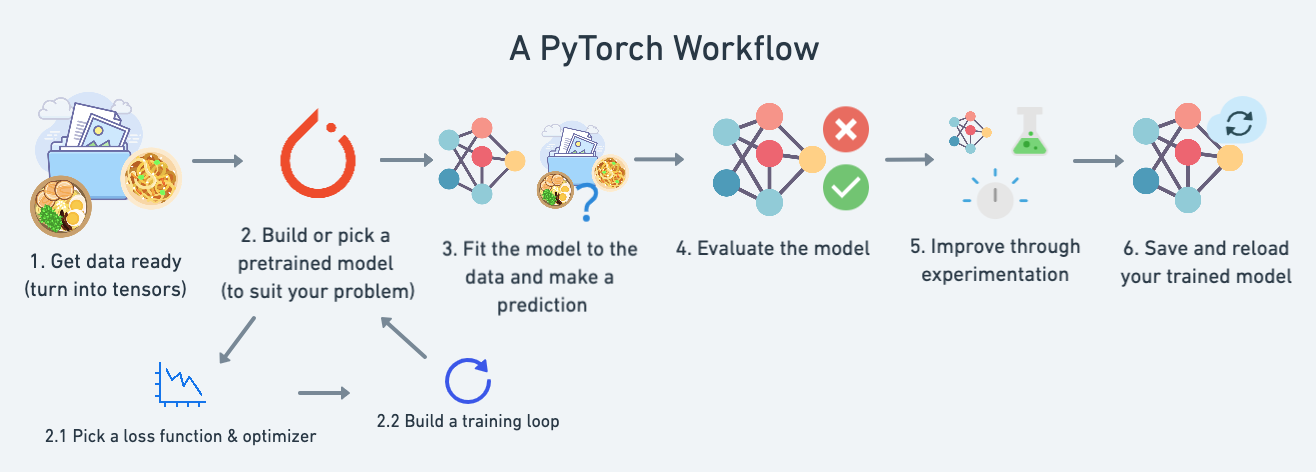

## Creating PyTorch Workflow

In [33]:
## Import necessary libraries
import torch
from torch import nn # nn contains all of PyTorch's building blocks for a neural network
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.4.1+cu121'

In [34]:
# creating a function to print tensor
def print_tensor(tensor) -> None:
    """
    Prints the tensor provided as an argument.

    Args:
      tensor: The tensor to be printed.

    Returns:
      None
    """

    print(tensor)

In [35]:
# creating a function to get tensor attributes
def get_tensor_attributes(tensor) -> None:
    """
    Prints the attributes (Datatype, Shape, Dimentions, Device) of the tensor provided as an argument.

    Args:
      tensor: The tensor whose attributes need to be printed.

    Returns:
      None
    """

    print(f'Datatype of tensor: {tensor.dtype}')
    print(f'No. of Dimentions: {tensor.ndim}')
    print(f'Shape of tensor: {tensor.shape}')
    print(f'Device tensor is on: {tensor.device}')

In [36]:
# creating a funtion to visualize data
def visualize_data(X_train, y_train, X_test, y_test, preds=None) -> None:
    """
    Visualizes data points and optionally model predictions.

    Args:
      X_train: Training data features.
      y_train: Training data labels.
      X_test: Test data features.
      y_test: Test data labels.
      preds: Model predictions. Default: `None`.

    Returns:
      None
    """

    plt.figure(figsize=(10, 7))
    plt.scatter(X_train, y_train, c='b', label='Training data')
    plt.scatter(X_test, y_test, c='g', label='Testing data')

    # visualizing model predictions is available
    if preds is not None:
        plt.scatter(X_test, preds, c='r', label='Predictions')
    plt.legend(prop={'size': 14})
    plt.xlabel('X')
    plt.ylabel('y')

In [37]:
# creating a function to print model parameters
def get_model_parameters(model) -> None:
    """
    Prints the parameters of the provided model.

    Args:
      model: The PyTorch model whose parameters need to be printed.

    Returns:
      None
    """

    for parameter, value in model.state_dict().items():
        print(f'{parameter}: {value}')

## 1. Data (Preparing and Loading)

Data can be almost anything.. in machine learning

* Excel spreadsheet
* Images of any kind
* Videos (YouTube)
* Audio
* DNA

Machine Learning is of two parts:
1. Get data in numerical representation
2. Build a model to learn patterns in that data

Let's create some *known* data using linear regression formula

In [38]:
# Create 'known' parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [39]:
print_tensor(X[:10])
get_tensor_attributes(X)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
Datatype of tensor: torch.float32
No. of Dimentions: 2
Shape of tensor: torch.Size([50, 1])
Device tensor is on: cpu


In [40]:
print_tensor(y[:10])
get_tensor_attributes(y)

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
Datatype of tensor: torch.float32
No. of Dimentions: 2
Shape of tensor: torch.Size([50, 1])
Device tensor is on: cpu


In [41]:
# splitting the data into training data and test data
train_split = int(0.8 * len(X)) # creating a split at 80% mark

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

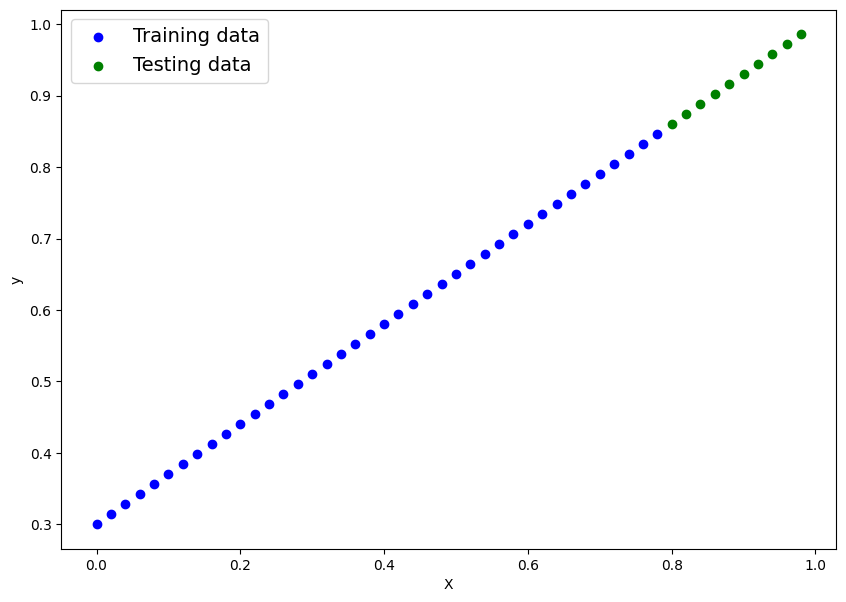

In [42]:
# visualizing the data
visualize_data(X_train, y_train, X_test, y_test)

## 2. A PyTorch Model on Linear Regression

What our model does:

Start with random values (weight & bias)
Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)
How does it do so?

Through two main algorithms:

* Gradient descent - https://youtu.be/IHZwWFHWa-w
* Backpropagation - https://youtu.be/Ilg3gGewQ5U

In [43]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        # defining the weight Parameter for our model
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

        # defining the Bias Parameter for our model
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # defining the forward method
    def forward(self, x:torch.tensor) -> torch.tensor:
        return self.weights * x + self.bias

PyTorch model building essentials
* `torch.nn`: Contains all of the buildings for computational graphs (a neural
network can be considered a computational graph)
* `torch.nn.Parameter`: What parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* `torch.nn.Module`: The base class for all neural network modules, if you subclass it, you should overwrite `forward()`
* `torch.optim`: This is where the optimizers in PyTorch live, they will help with gradient descent
* `def forward()`: All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

In [44]:
# creating an instance of our model
torch.manual_seed(42)
model_0 = LinearRegressionModel()

In [45]:
# checking the model parameters
get_model_parameters(model_0)

weights: tensor([0.3367])
bias: tensor([0.1288])


### 2.1 Making prediction using torch.inference_mode()

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data to our model, it'll go through the model's `forward()` method and produce a result using the computation we've defined

In [46]:
with torch.inference_mode():
    y_preds = model_0(X_test)

`torch.inference_mode()` turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make **forward-passes** (data going through the `forward()` method) faster.

In [47]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

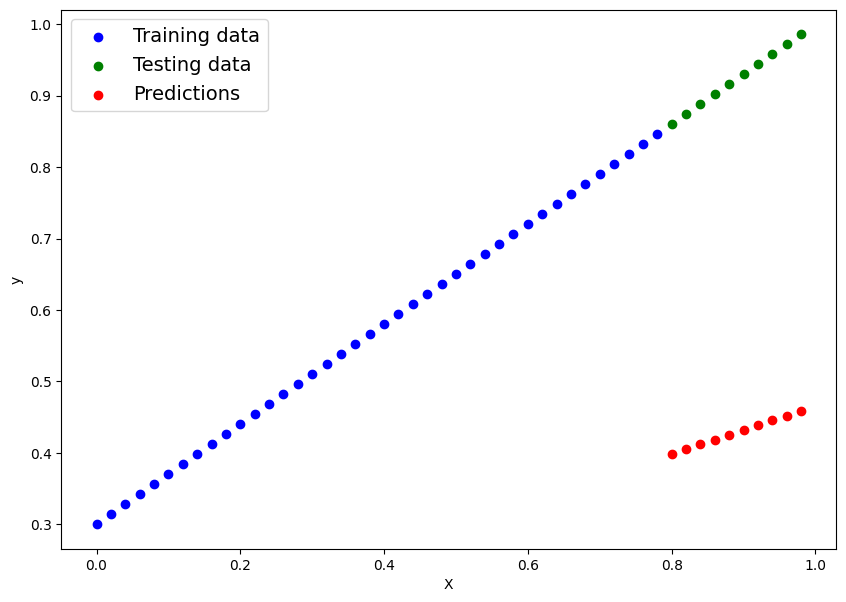

In [48]:
# visualizing predicted data
visualize_data(X_train, y_train, X_test, y_test, y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a **loss function**.

**Note:** Loss function may also be called **cost function or criterion** in different areas. For our case, we're going to refer to it as a loss function.
Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function - https://pytorch.org/docs/stable/optim.html#module-torch.optim

Inside the optimizer you'll often have to set two parameters:
* `params:` the model parameters you'd like to optimize, for example `params=model_0.parameters()`
* `lr (learning rate):` the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small lr results in small changes, a large lr results in large changes)

And specifically for PyTorch, we need:

* A training loop
* A testing loop

In [49]:
# setting up loss function (Mean Absolute Error)
loss_fn = nn.L1Loss()

# setting up an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

### 3.1 Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:

0. Loop through the data and do...

1. **Forward pass** (this involves data moving through our model's `forward()` functions) to make predictions on data: also called **forward propagation**

2. **Calculate the loss** (compare forward pass predictions to ground truth labels)

3. Optimizer zero grad

4. **Loss backward:** move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation:** https://www.youtube.com/watch?v=tIeHLnjs5U8)

5. **Optimizer step:** use the optimizer to adjust our model's parameters to try and improve the loss
(**gradient descent:** https://youtu.be/IHZwWFHWa-w)

In [50]:
# setting up epochs: An epoch is one loop through the data
epochs = 200

# tracking the model performance
epoch_count = []
train_loss_values = []
test_loss_values = []


# setting up the training loop

### training
# 0. Loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train()

    # 1. Forward Pass
    y_preds = model_0(X_train)

    # 2. Calculate Train Loss
    train_loss = loss_fn(y_preds, y_train)

    # 3. Optimizer Zero Grad
    optimizer.zero_grad()

    # 4. Perform Backpropogation on the loss w.r.t. parameters of model
    train_loss.backward()

    # 5. Optimizer Step (Perform gradient descent)
    optimizer.step()


    ### testing
    model_0.eval() # turns of different settings that do not require for testing

    with torch.inference_mode(): # turns off gradient tracking
        y_preds = model_0(X_test)

        # 2. Calculate Loss
        test_loss = loss_fn(y_preds, y_test)

    # print out what's happening
    if epoch  % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(train_loss)
        test_loss_values.append(test_loss)
        print(f'Epoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}')

        # printing model parameters
        get_model_parameters(model_0)
        print()

Epoch: 0 | Train Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
weights: tensor([0.3406])
bias: tensor([0.1388])

Epoch: 10 | Train Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
weights: tensor([0.3796])
bias: tensor([0.2388])

Epoch: 20 | Train Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
weights: tensor([0.4184])
bias: tensor([0.3333])

Epoch: 30 | Train Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
weights: tensor([0.4512])
bias: tensor([0.3768])

Epoch: 40 | Train Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
weights: tensor([0.4748])
bias: tensor([0.3868])

Epoch: 50 | Train Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
weights: tensor([0.4938])
bias: tensor([0.3843])

Epoch: 60 | Train Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
weights: tensor([0.5116])
bias: tensor([0.3788])

Epoch: 70 | Train Loss: 0.03476089984178543 | Test Loss: 0.0805937647819519
weights: tensor([0.5288])
bias: tenso

In [51]:
# making predictions
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

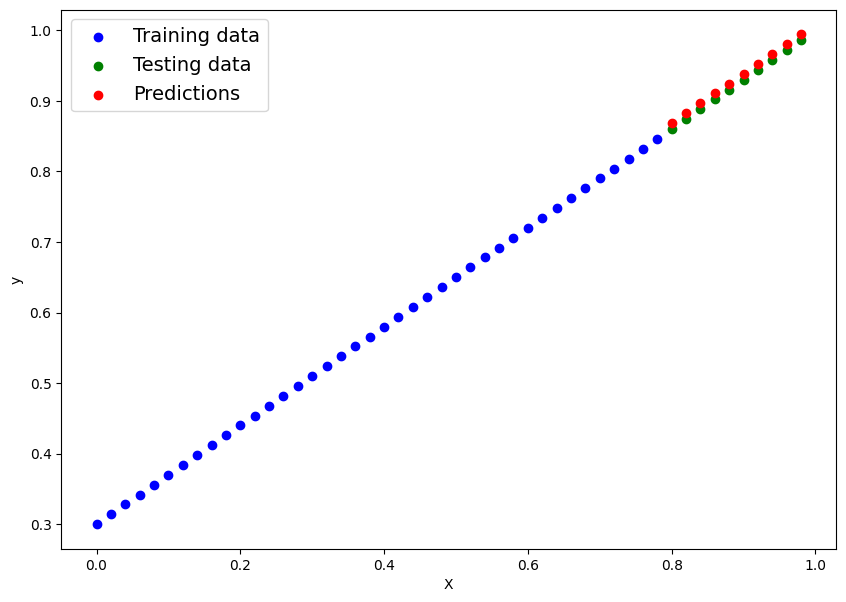

In [52]:
# visualizing the predictions
visualize_data(X_train, y_train, X_test, y_test, y_preds)

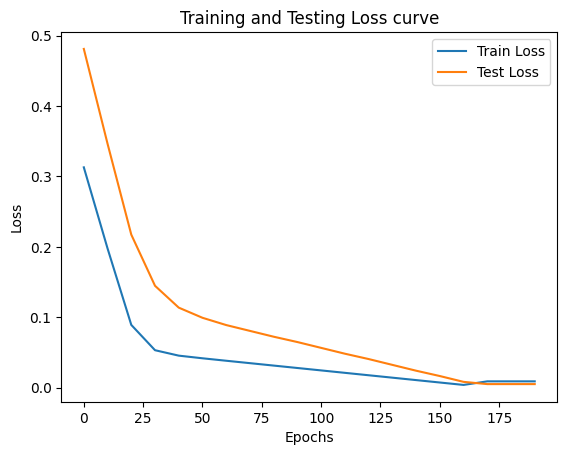

In [53]:
import numpy as np

# plot the train loss curve
plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).numpy()), label='Train Loss')
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.title('Training and Testing Loss curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## 4. Saving a PyTorch Model

There are three main methods for saving and loading a PyTorch Model

1. `torch.save()`: saves a PyTorch object in python pickle format.
2. `torch.load()`: allows you to load a saved PyTorch Model
3. `torch.nn.Module.load_state_dict()`: allows you to load a model's saved state dictionary (Reccomended)

In [54]:
# save the model state dictionary
torch.save(obj=model_0.state_dict(), f='01_workflow_model.pth')

In [57]:
# loading a PyTorch Model
loaded_model = LinearRegressionModel()

loaded_model.load_state_dict(torch.load(f='01_workflow_model.pth', weights_only=True))

<All keys matched successfully>

In [61]:
get_model_parameters(loaded_model)

weights: tensor([0.6990])
bias: tensor([0.3093])


## 5. Putting it all together

Let's see all the above steps in one place

In [63]:
# import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# check the PyTorch version
print(torch.__version__)

2.4.1+cu121


Create device-agnostic code: if we have a gpu, assign tensors to the gpu, if not, default to cpu

In [66]:
# setup device-agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cpu


### 5.1 Data

In [69]:
# create some data using the linear regression formula
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

# create X (features) and y (labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias


In [70]:
# split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


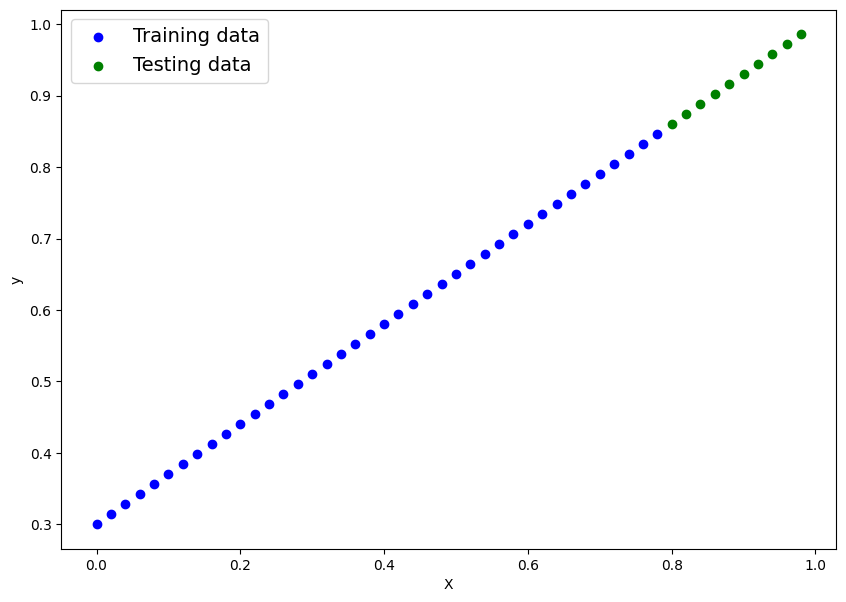

In [71]:
# plot the data
visualize_data(X_train, y_train, X_test, y_test)

### 5.2 Building a PyTorch linear model

In [86]:
# create a model
class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()

        # define the layers
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    # setup forward method
    def forward(self, x:torch.tensor) -> torch.tensor:
        return self.linear_layer(x)

# set the manual seed
torch.manual_seed(42)

# instanciation of model
model_1 = LinearModel()

### 5.3 Training the model

In [87]:
# setting up loss function
loss_fn = nn.L1Loss()

# setting up optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.001)

In [88]:
# setup model on device
model_1.to(device)

# setup data on device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


# setup training loop

epochs = 300

for epoch in range(epochs):
    # set the model to training mode
    model_1.train()

    # forward pass
    y_preds = model_1(X_train)

    # calculate loss
    train_loss = loss_fn(y_preds, y_train)

    # optimizer zero grad
    optimizer.zero_grad()

    # perform backpropogation
    train_loss.backward()

    # optimizer step
    optimizer.step()

    ### testing
    # setting model to evaluation mode
    model_1.eval()

    #using inference_mode context manager
    with torch.inference_mode():
        test_preds = model_1(X_test)
        test_loss = loss_fn(test_preds, y_test)

    # print what is happening
    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Loss: {train_loss} | Test Loss: {test_loss}')

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5861000418663025
Epoch: 10 | Loss: 0.543657124042511 | Test Loss: 0.5726292729377747
Epoch: 20 | Loss: 0.5321362614631653 | Test Loss: 0.559158444404602
Epoch: 30 | Loss: 0.5206153988838196 | Test Loss: 0.5456877946853638
Epoch: 40 | Loss: 0.5090945363044739 | Test Loss: 0.5322169065475464
Epoch: 50 | Loss: 0.4975736737251282 | Test Loss: 0.518746018409729
Epoch: 60 | Loss: 0.48605290055274963 | Test Loss: 0.505275309085846
Epoch: 70 | Loss: 0.47453203797340393 | Test Loss: 0.49180442094802856
Epoch: 80 | Loss: 0.4630111753940582 | Test Loss: 0.47833362221717834
Epoch: 90 | Loss: 0.4514903128147125 | Test Loss: 0.4648628234863281
Epoch: 100 | Loss: 0.4399694502353668 | Test Loss: 0.4513920247554779
Epoch: 110 | Loss: 0.4284486174583435 | Test Loss: 0.4379211962223053
Epoch: 120 | Loss: 0.4169277548789978 | Test Loss: 0.4244503974914551
Epoch: 130 | Loss: 0.4054069519042969 | Test Loss: 0.41097956895828247
Epoch: 140 | Loss: 0.393886119

In [89]:
get_model_parameters(model_1)

linear_layer.weight: tensor([[0.6475]])
linear_layer.bias: tensor([0.5300])


### 5.4 Making predictions

In [90]:
# make predictions using inference_mode()
with torch.inference_mode():
    y_preds = model_1(X_test)


In [91]:
y_preds

tensor([[1.0480],
        [1.0610],
        [1.0739],
        [1.0869],
        [1.0998],
        [1.1128],
        [1.1257],
        [1.1387],
        [1.1517],
        [1.1646]])

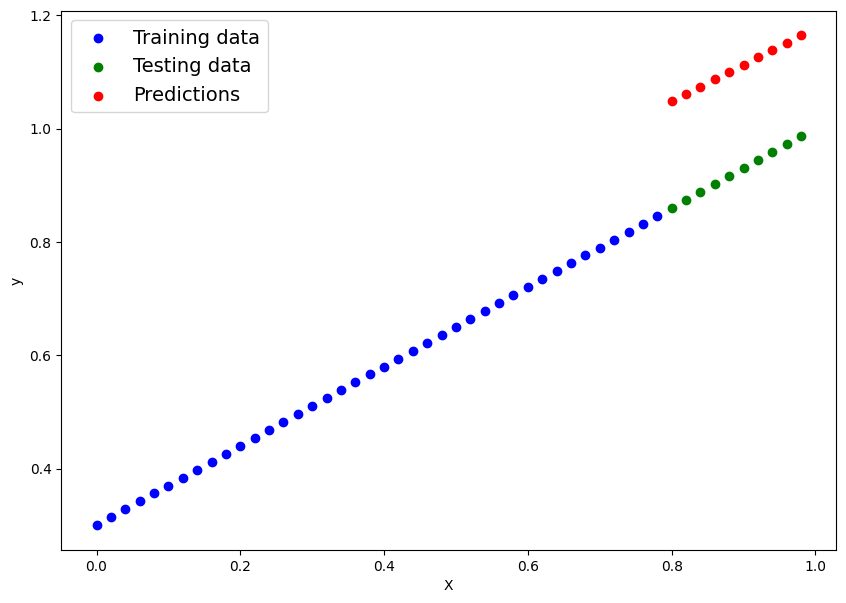

In [92]:
# visualize the predictions
visualize_data(X_train, y_train, X_test, y_test, y_preds)

### 5.5 Saving the model

In [93]:
# saving the model using torch.save()
torch.save(obj=model_1.state_dict(), f='01_workflow_model_V2.pth')